# Cleaning Kaggle Survey Data

In [702]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [674]:
# locating data
filename = 'multipleChoiceResponses.csv'

# selecting columns
columns_we_care = ['Q3', 'Q6', 'Q9']

# opening data in dataframe
mcr = pd.read_csv(filename, usecols= columns_we_care)

# renaming columns
col_renames = {'Q3': 'country', 'Q6': 'job_title', 'Q9': 'salary'}

mcr.rename(columns= col_renames, inplace= True)
# drop the question row
mcr.drop(index=0, inplace= True)

# drop nans
mcr.dropna(inplace= True)

In [675]:
# defining list of job titles we are interested in
job_list = ['data scientist',
'software engineer',
 'data analyst',
 'research scientist',
 'business analyst',
 'product manager',
 'project manager',
 'data engineer',
 'statistician',
 'dba',
 'database engineer',
 'machine learning engineer']

In [676]:
# filtering our data by removing rows in which people declined to answer and if the job is in our list
mcr_jobs = mcr[(mcr['job_title'].str.lower().isin(job_list)) & (mcr['country'].str.contains('I do not wish') == False) & (mcr['salary'].str.contains('I do not wish') == False)]
mcr_jobs

,country,job_title,salary
3,United States of America,Data Scientist,"0-10,000"
5,India,Data Analyst,"0-10,000"
10,Hungary,Software Engineer,"20-30,000"
12,United States of America,Data Scientist,"125-150,000"
15,Argentina,Data Analyst,"10-20,000"
...,...,...,...
23824,United Kingdom of Great Britain and Northern I...,Research Scientist,"70-80,000"
23833,Turkey,Data Engineer,"0-10,000"
23839,Turkey,Data Analyst,"0-10,000"
23844,Netherlands,Software Engineer,"90-100,000"


In [677]:
# cleaning the salary values and including only the high end
mcr_jobs['salary'] = mcr_jobs['salary'].str.split('-').str[-1].str.replace(',', '').str.replace('+', '').astype('int32')

C:\Users\Zaca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [724]:
worldwide_salaries_country = mcr_jobs.groupby(by =['country'])['salary'].mean()
worldwide_salaries_country

country
Argentina                                                34067.796610
Australia                                                95000.000000
Austria                                                  53571.428571
Bangladesh                                               20714.285714
Belarus                                                  25652.173913
Belgium                                                  62058.823529
Brazil                                                   33764.705882
Canada                                                   80329.457364
Chile                                                    55000.000000
China                                                    39038.461538
Colombia                                                 38767.123288
Czech Republic                                           38857.142857
Denmark                                                  83617.021277
Egypt                                                    17931.034483
Finland     

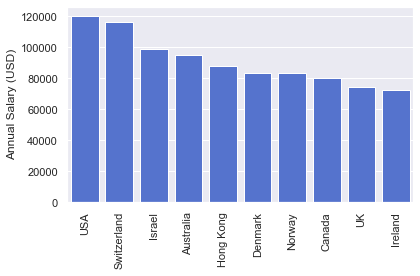

In [729]:
salaries_country = worldwide_salaries_country.sort_values(ascending=False)[:10]

plt.figure(figsize=(6, 4))
salary_bar = sns.barplot(['USA', 'Switzerland', 'Israel', 'Australia', 'Hong Kong', 'Denmark', 'Norway', 'Canada', 'UK', 'Ireland'], salaries_country.values, color='royalblue')
plt.xticks(rotation= 90)
plt.xlabel('')
plt.ylabel('Annual Salary (USD)')
plt.tight_layout()
plt.savefig('salary_countries.png', dpi=1200)


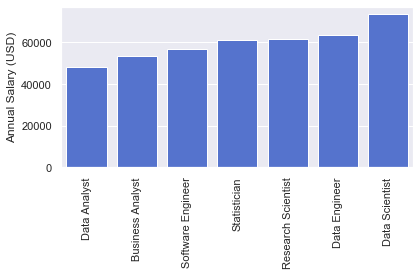

In [716]:
worldwide_salaries_jobs = mcr_jobs.groupby(by= ['job_title'])['salary'].mean().sort_values()

worldwide_salaries_jobs

plt.figure(figsize=(6, 4))
salary_bar = sns.barplot(worldwide_salaries_jobs.index, worldwide_salaries_jobs.values, color='royalblue')
plt.xticks(rotation= 90)
plt.xlabel('')
plt.ylabel('Annual Salary (USD)')
plt.tight_layout()
plt.savefig('salary_jobs.png', dpi=1200)

AttributeError: 'AxesSubplot' object has no attribute 'sort_values'

In [ ]:
worldwide = mcr_jobs.groupby(['job_title', 'country']).agg({'salary': 'mean'}).unstack(level= 0)

In [ ]:
worldwide.columns = [x[1] for x in worldwide.columns.values]

In [ ]:
worldwide = worldwide.reset_index()


In [ ]:
worldwide = worldwide.sort_values(by='Business Analyst', ascending= False).reset_index(drop=True).reset_index()
worldwide.rename(columns= {'index': 'Business Analyst Rank'}, inplace=True)

worldwide = worldwide.sort_values(by='Data Analyst', ascending= False).reset_index(drop=True).reset_index()
worldwide.rename(columns= {'index': 'Data Analyst Rank'}, inplace=True)

worldwide = worldwide.sort_values(by='Data Engineer', ascending= False).reset_index(drop=True).reset_index()
worldwide.rename(columns= {'index': 'Data Engineer Rank'}, inplace=True)

worldwide = worldwide.sort_values(by='Data Scientist', ascending= False).reset_index(drop=True).reset_index()
worldwide.rename(columns= {'index': 'Data Scientist Rank'}, inplace=True)


In [ ]:
rankings = worldwide[['country', 'Business Analyst Rank', 'Data Analyst Rank', 'Data Scientist Rank', 'Data Engineer Rank']]
rankings = rankings.sort_values(by='country').reset_index(drop=True)

In [717]:
worldwide

,Data Scientist Rank,Data Engineer Rank,Data Analyst Rank,Business Analyst Rank,country,Business Analyst,Data Analyst,Data Engineer,Data Scientist,Research Scientist,Software Engineer,Statistician
0,0,30,38,40,Kenya,23333.333333,24230.769231,35000.000000,149000.000000,30000.000000,16250.000000,205000.000000
1,1,1,2,3,United States of America,86493.055556,81261.127596,126610.169492,136589.195980,109885.057471,136550.000000,111444.444444
2,2,2,14,1,Switzerland,150000.000000,58000.000000,125000.000000,130500.000000,108928.571429,113055.555556,141666.666667
3,3,0,10,11,Israel,67500.000000,64000.000000,185000.000000,104259.259259,101000.000000,86500.000000,30000.000000
4,4,5,4,4,Australia,84500.000000,71250.000000,93571.428571,103979.591837,100277.777778,114375.000000,73333.333333
5,5,8,12,10,Canada,68703.703704,60735.294118,85384.615385,91315.789474,84444.444444,76896.551724,70000.000000
6,6,3,20,9,Ireland,70000.000000,46363.636364,102500.000000,87000.000000,66666.666667,62000.000000,150000.000000
7,7,35,19,54,Republic of Korea,NaN,50000.000000,30000.000000,85000.000000,36250.000000,76666.666667,NaN
8,8,50,1,2,Denmark,115000.000000,83750.000000,NaN,84761.904762,77857.142857,71000.000000,100000.000000
9,9,49,0,5,Norway,77500.000000,91666.666667,NaN,84666.666667,93000.000000,76666.666667,NaN


In [ ]:
rankings.to_csv('salary_rankings.csv')

In [ ]:
worldwide

In [ ]:
de_rank = worldwide[['country', 'Data Engineer']].dropna()
da_rank = worldwide[['country', 'Data Analyst']].dropna()
ba_rank = worldwide[['country', 'Business Analyst']].dropna()
ds_rank = worldwide[['country', 'Data Scientist']].dropna()

In [ ]:
de_rank = de_rank.sort_values(by='Data Engineer', ascending= False).reset_index(drop=True)
da_rank = da_rank.sort_values(by='Data Analyst', ascending= False).reset_index(drop=True)
ba_rank = ba_rank.sort_values(by='Business Analyst', ascending= False).reset_index(drop=True)
ds_rank = ds_rank.sort_values(by='Data Scientist', ascending= False).reset_index(drop=True)

da_rank

In [ ]:
de_rank['Data Engineer'] = [x for x in de_rank.index]
da_rank['Data Analyst'] = [x for x in da_rank.index]
ba_rank['Business Analyst'] = [x for x in ba_rank.index]
ds_rank['Data Scientist'] = [x for x in ds_rank.index]

ba_rank

In [ ]:
rankings_clean = pd.DataFrame(worldwide['country'])

In [ ]:
rankings_clean = rankings_clean.merge(de_rank, on='country', how= 'outer').merge(da_rank, on= 'country', how='outer').merge(ba_rank, on= 'country', how='outer').merge(ds_rank, on= 'country', how='outer').sort_values(by= 'country').reset_index(drop=True)


In [ ]:
rankings_clean.to_csv('salary_rankings_clean.csv')